# First we will import all the relevant dependencies we need.

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 65.8MB 57kB/s 


In [ ]:
# lets ımport matplotlib 
%matplotlib inline

import math, time, random, datetime

# we going to use pandas and numpy to make data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')




print("Code Completed")

Code Completed


In [ ]:
# Lets import data
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv')
test1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv')
test2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/test1.csv')
gender = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/gender_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# lets view the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
len(train)

891

In [ ]:
# lets view the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
len(test)

418

In [ ]:
# lets view the gender data
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
len(gender)

418

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# What Missing Values are There ?
Where are the holes in our data ?

There are rows which are missing a value or have NaN

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


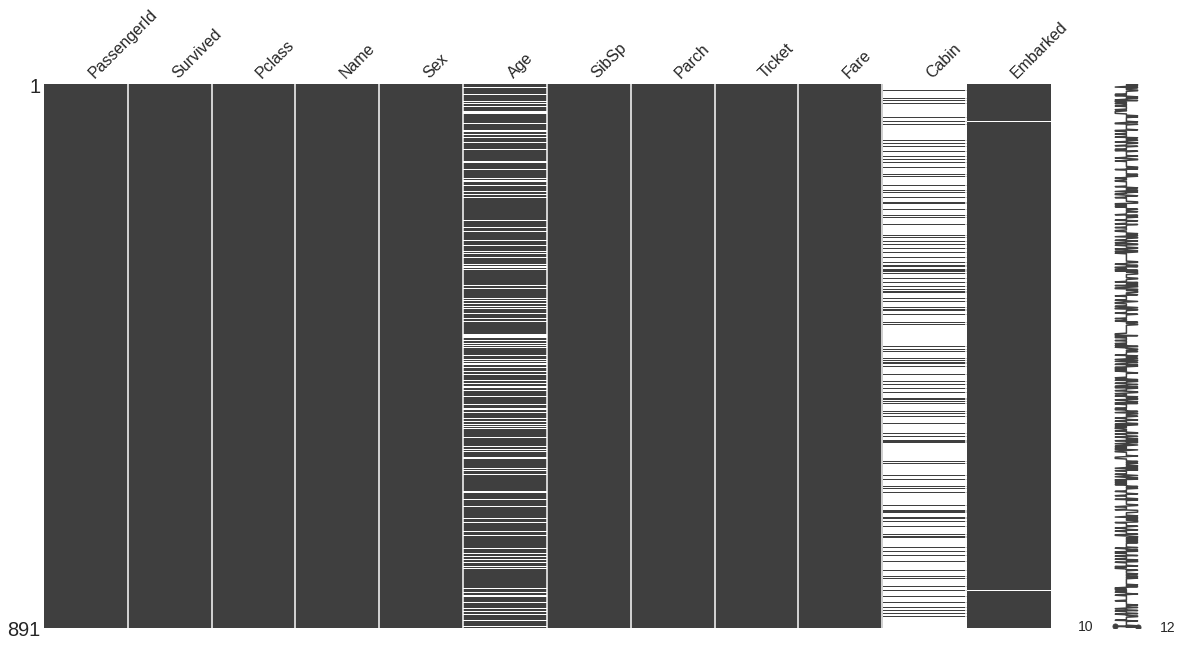

In [ ]:
# Lets plot graphic of missing values.
missingno.matrix(train, figsize= (20, 10))

In [ ]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Lets Create Two Data Frames


In [ ]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables
# all numbers between 0-50 it is continues variables


# 0-10 = 1
# 10-20 = 2       # these are discretised continues variables
# 20-30  = 3            

# What data types we have in dataframe ?


In [ ]:
# different datatypes in the train dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Now lets look at each of these features individually.

First of all our *Target* Feature is survived

0    549
1    342
Name: Survived, dtype: int64


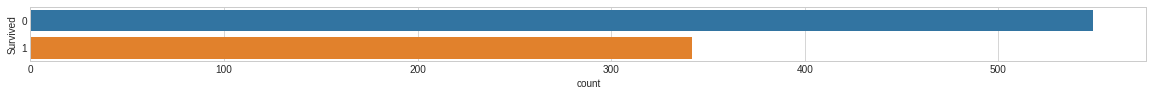

In [ ]:
# How many people is survived ?
fig = plt.figure(figsize=(20,1))
sns.countplot(y = 'Survived', data = train);
print(train.Survived.value_counts())


In [ ]:
#  Let's add this to our empty data set
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [ ]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Next Target Feature is Pclass

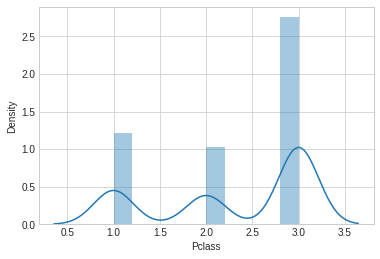

In [ ]:
sns.distplot(train.Pclass)

In [ ]:
# Lets look at how many missing values in Pclass
train.Pclass.isnull().sum()

0

We don't have any missing values in Pclass which is awesome.

Since there are no missing values in Pclass, let's add it to our sub dataframes.







In [ ]:
df_bin['Pclass'] = train['Pclass'] 
df_con['Pclass'] = train['Pclass'] 

In [ ]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [ ]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


## Next Feature : Names

In [ ]:
train.Name.value_counts()

Flynn, Mr. James                                 1
Sinkkonen, Miss. Anna                            1
Quick, Mrs. Frederick Charles (Jane Richards)    1
Nye, Mrs. (Elizabeth Ramell)                     1
Silvey, Mrs. William Baird (Alice Munger)        1
                                                ..
Parrish, Mrs. (Lutie Davis)                      1
Kirkland, Rev. Charles Leonard                   1
Dick, Mr. Albert Adrian                          1
Bateman, Rev. Robert James                       1
Hosono, Mr. Masabumi                             1
Name: Name, Length: 891, dtype: int64

## Next Feature : Sex

male      577
female    314
Name: Sex, dtype: int64


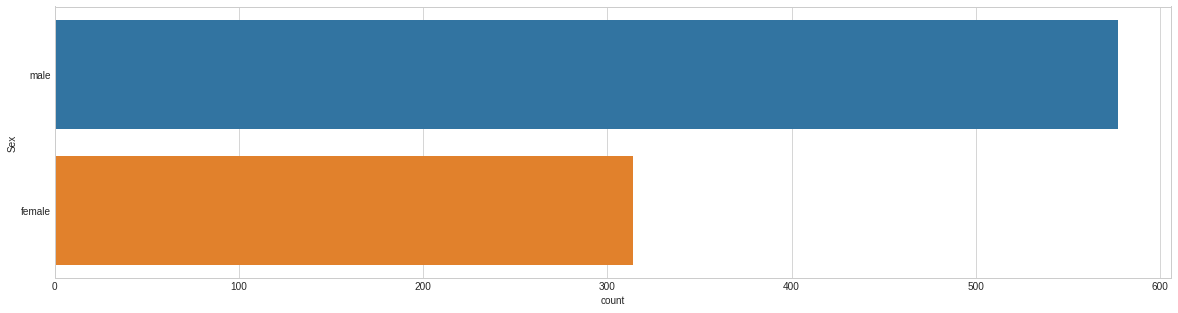

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(y = 'Sex', data = train)
print(train.Sex.value_counts())

In [ ]:
train.Sex.isnull().sum() # we dont have any missing values

0

In [ ]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:

# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [ ]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [ ]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


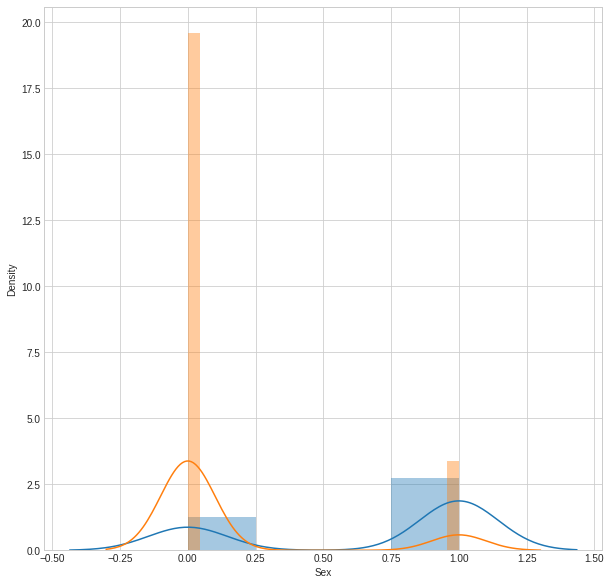

In [ ]:

# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

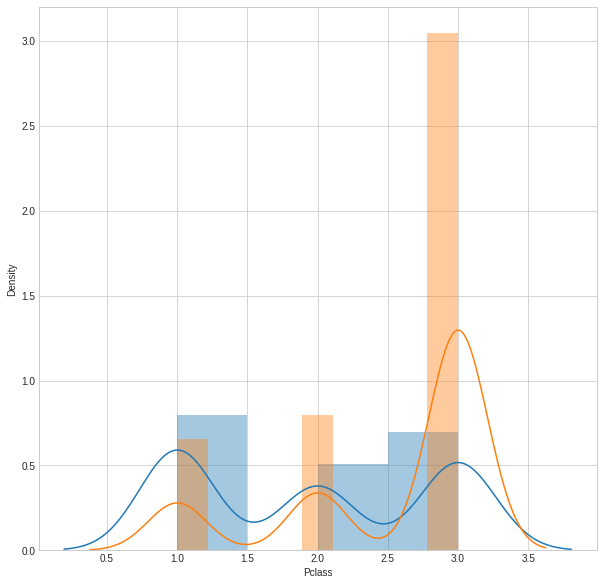

In [ ]:

# How does the Pclass variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Pclass'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Pclass'], kde_kws={'label': 'Did not survive'});

## New Feature Age

In [ ]:
#First of all lets lokk at the missing values in "Age"
train.Age.isnull().sum()

177

In [ ]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"})

## Feature Sibsp

In [ ]:
#First of all lets lokk at the missing values in "Sibsp"
train.SibSp.isnull().sum()
# we dont have missing values great !

0

In [ ]:
# Lets lokk at what values are there ?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

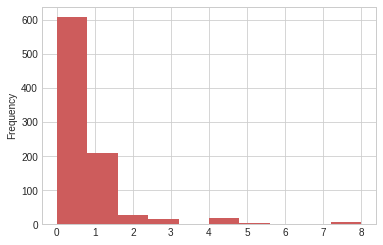

In [ ]:
train.SibSp.plot.hist(color = 'indianred')

In [ ]:
# Let's add SibSp to our subset dataframes an wiev the distribution
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

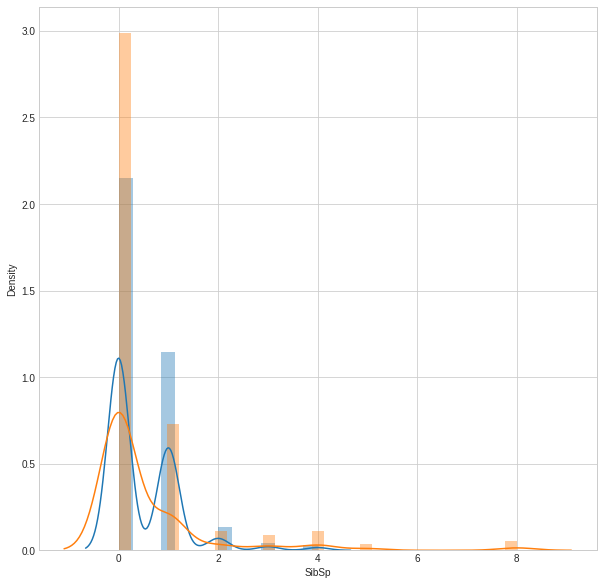

In [ ]:
# How does the SibSp variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['SibSp'], kde_kws={'label': 'Did not survive'});

## Ner Feature : Parch

In [ ]:
# How many missing values does Parch have ?
train.Parch.isnull().sum()
#thats great we dont have any epty values

0

In [ ]:
#What values are there ?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

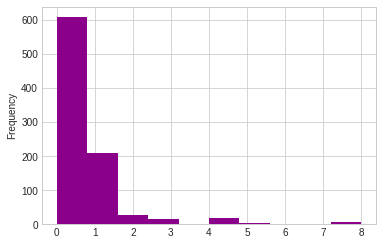

In [ ]:
# Histogram of Parch values
train.SibSp.plot.hist(color = 'darkmagenta')

In [ ]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

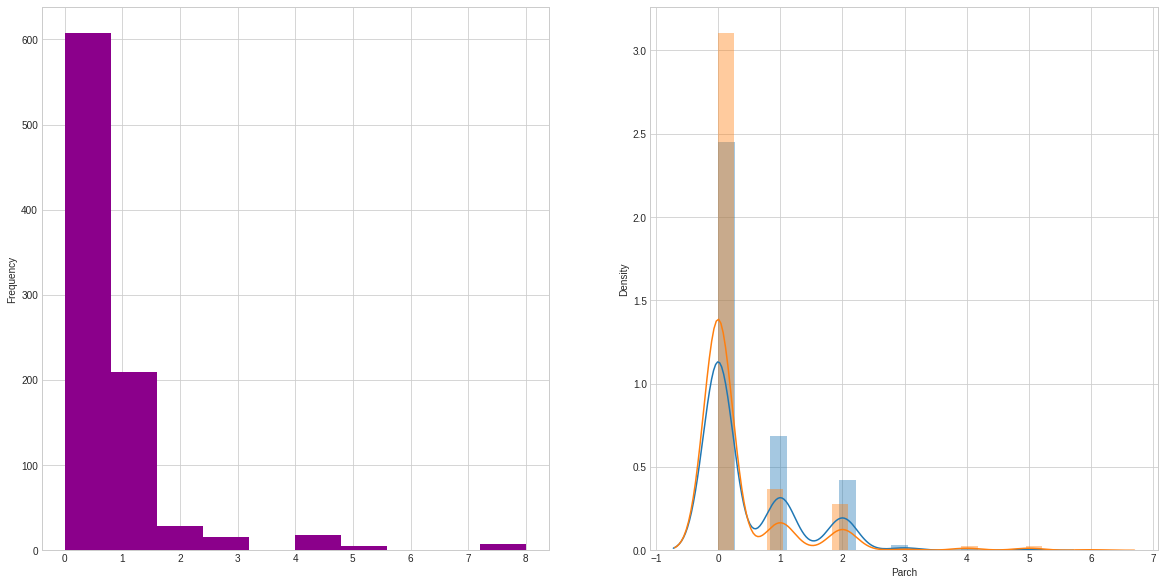

In [ ]:
# How does the Parch variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize= (20, 10))
plt.subplot(1, 2, 1)
train.SibSp.plot.hist(color = 'darkmagenta');
plt.subplot(1, 2, 2)
sns.distplot(train.loc[train['Survived'] == 1]['Parch'], 
kde_kws={"label": "Survived"});
sns.distplot(train.loc[train['Survived'] == 0]['Parch'], 
kde_kws={"label": "Did not survive"});

## Feature : Ticket

In [ ]:
# Obviously first of all let's see how many missing values we have ?
train.Ticket.isnull().sum()

0

In [ ]:
# Let's see how many kind tickets we have 
train.Ticket.value_counts()

CA. 2343      7
347082        7
1601          7
CA 2144       6
3101295       6
             ..
239855        1
C.A. 17248    1
PC 17601      1
347073        1
374910        1
Name: Ticket, Length: 681, dtype: int64

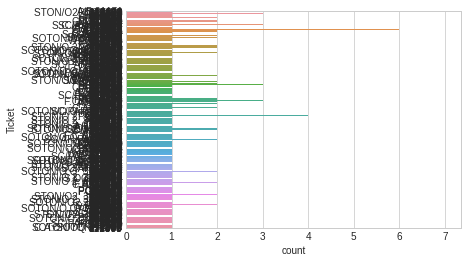

In [ ]:
# Let's use some visualization 
sns.countplot(y = "Ticket", data = train)

In [ ]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


## Another Feature : Fare

In [ ]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

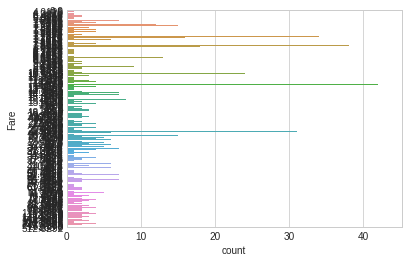

In [ ]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [ ]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [ ]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [ ]:
# Let's look at how our fare bins look like
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

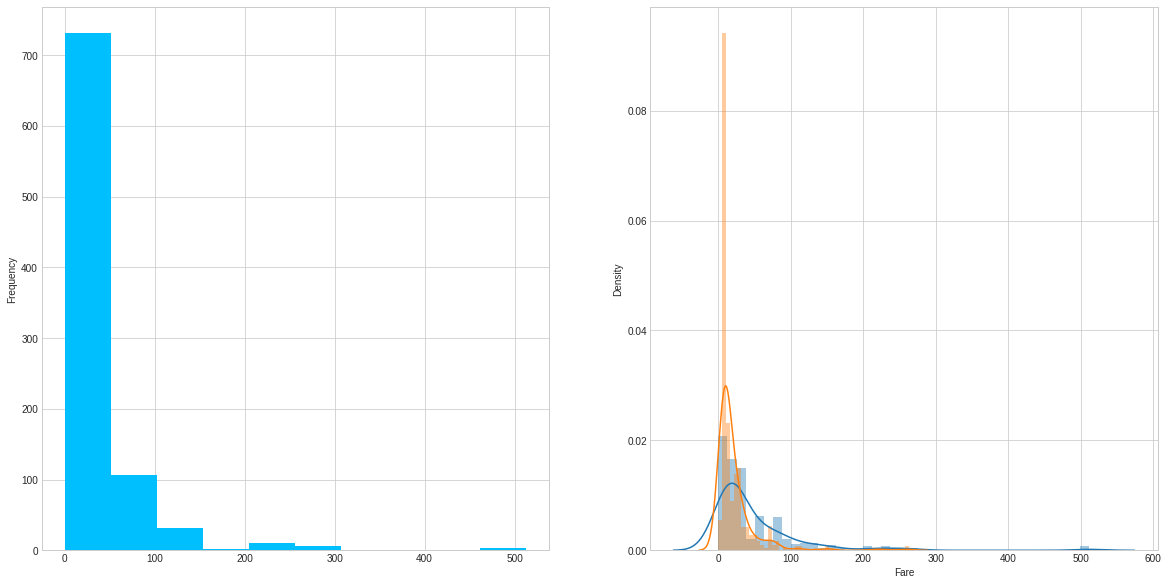

In [ ]:
# How does the Parch variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize= (20, 10))
plt.subplot(1, 2, 1)
train.Fare.plot.hist(color = 'deepskyblue');
plt.subplot(1, 2, 2)
sns.distplot(train.loc[train['Survived'] == 1]['Fare'], 
kde_kws={"label": "Survived"});
sns.distplot(train.loc[train['Survived'] == 0]['Fare'], 
kde_kws={"label": "Did not survive"});

## Feature Cabin

In [ ]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# What do the Cabin values look like?
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
C90            1
A6             1
C49            1
E40            1
C110           1
Name: Cabin, Length: 147, dtype: int64

## Feature : Embarked

In [ ]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [ ]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

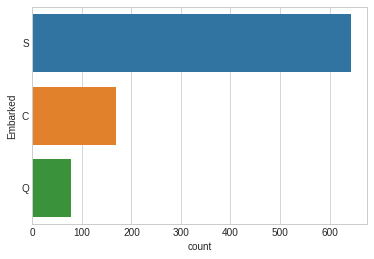

In [ ]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

In [ ]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [ ]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

## Feature Encoding

In [ ]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [ ]:
# One-Hot encode binned variables
#one_hot_cols = df_bin.columns.tolist()
#one_hot_cols.remove('Survived')
#df_bin_enc = pd.get_dummies(df_bin, columns = one_hot_cols)
#df_bin_enc.head()

In [ ]:
df_con.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [ ]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix= 'embarked')
df_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix= 'sex')
df_Pclass_one_hot = pd.get_dummies(df_con['Pclass'], prefix= 'pclass')

In [ ]:
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot,
                        df_sex_one_hot, 
                        df_Pclass_one_hot], axis=1)



In [ ]:
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,male,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1,1,0,1,0,0
4,0,3,male,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [ ]:
# We should drop Pclass Sex and Embarked data
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
df_con_enc.head(20) # that better

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## Building Machine Learning Models

## Let's Separate the data

In [ ]:
# select the data_frame
selected_df = df_con_enc

In [ ]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
# Split our data_frame into features and target
X_train = selected_df.drop('Survived', axis=1) # Features 
y_train = selected_df.Survived #target

In [ ]:
X_train.head()


,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
y_train.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Let's define a function to fit machine learning algorithms. We going to test bunch of algorithms.

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
  # One pass
  model = algo.fit(X_train, y_train)
  acc = round(model.score(X_train, y_train)*100, 2)

  # Cross Validation
  train_pred = model_selection.cross_val_predict(algo,
                                                 X_train,
                                                 y_train,
                                                 cv=cv,
                                                 n_jobs = -1)
  # Cross-validation accuray metric
  acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)

  return train_pred, acc, acc_cv, model

##Logistic Regression

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:01.820809


## K-Nearest Neighbours

In [ ]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:01.415042


##Gaussian Naive Bayes

In [ ]:
# Gauissian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.072248


##Linear Support Vector Machines (SVC)¶


In [ ]:
# Linear Support Vector Machines
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.42
Accuracy CV 10-Fold: 75.59
Running Time: 0:00:00.408465


## Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.08
Accuracy CV 10-Fold: 69.74
Running Time: 0:00:00.128801


## Decision Tree Classifier

In [ ]:

# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.083292


##Gradient Boost Trees

In [ ]:
# Gradient Bosst Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt, gradient_model = fit_ml_algo(GradientBoostingClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                25)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 81.44
Running Time: 0:00:03.596700


# Model Results


## Regular accuracy scores

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
4,Linear SVC,79.42
3,Stochastic Gradient Decent,79.08
2,Naive Bayes,78.52
1,Logistic Regression,77.28


In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,81.44
7,CatBoost,81.32
5,Decision Tree,80.65
2,Naive Bayes,77.95
0,KNN,76.72
4,Linear SVC,75.59
3,Stochastic Gradient Decent,69.74
1,Logistic Regression,67.72


##Feature Importance

In [ ]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
9,0.000958,pclass_2
3,0.003272,embarked_C
4,0.004548,embarked_Q
5,0.017301,embarked_S
8,0.019836,pclass_1
0,0.022340,SibSp
1,0.033566,Parch
10,0.130459,pclass_3
7,0.239932,sex_male
2,0.244858,Fare


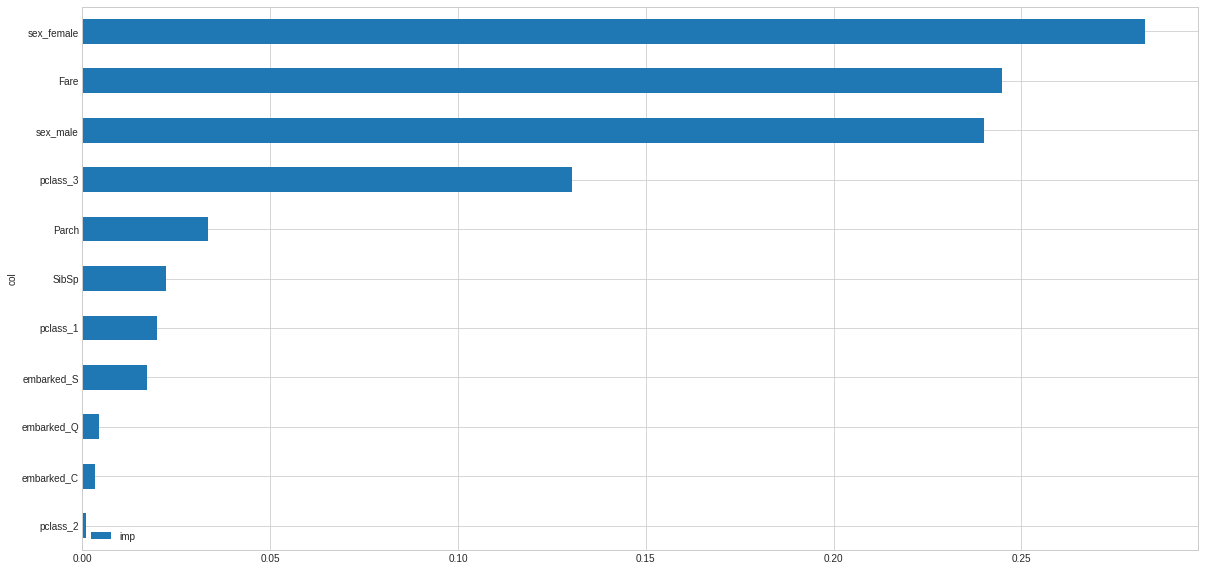

In [ ]:
# Plot the feature importance scores
feature_importance(gradient_model, X_train)